In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import joblib

# CSV 파일을 pandas DataFrame으로 불러오기
data_train = pd.read_csv('C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv', encoding='utf-8')
data_test = pd.read_csv('C:/Users/oceanlightai/Desktop/datasets/pet_skin/valid/valid_skin.csv', encoding='utf-8')

# 입력과 출력 변수 분리
X_train = data_train.drop(['lesions'], axis=1)
y_train = data_train['lesions']

X_test = data_test.drop(['lesions'], axis=1)
y_test = data_test['lesions']

# 범주형 변수를 원-핫 인코딩으로 변환 (breed, gender, region)
X_train = pd.get_dummies(X_train, columns=['breed', 'gender', 'region'])
X_test = pd.get_dummies(X_test, columns=['breed', 'gender', 'region'])

# xgboost 모델 초기화 및 훈련
model = XGBClassifier()
model.fit(X_train, y_train)

# 특징 중요도 계산
feature_importances = model.feature_importances_

# 중요도가 높은 순으로 특징 이름과 중요도 출력
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("데이터 특징 중요도:",feature_importance_df)

# 모델 평가
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print("모델 정확도:", accuracy)
print("정밀도:", precision)
print("재현율:", recall)
print("F1 스코어:", f1)
print("ROC AUC:", roc_auc)

# 클래스별 ROC 곡선 그리기
fpr = dict()
tpr = dict()
roc_auc_class = dict()
n_classes = len(model.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], model.predict_proba(X_test)[:, i])
    roc_auc_class[i] = roc_auc_score(y_test[:, i], model.predict_proba(X_test)[:, i])

# 모든 클래스를 하나의 그래프에 표시
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class %d, AUC = %.2f)' % (i, roc_auc_class[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()

# 실제값과 예측값을 산점도로 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True Values and Predictions')
plt.show()

In [ ]:
joblib.dump(model, 'xgboost_model.pkl')

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from xgboost import XGBClassifier

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드
data = pd.read_csv(csv_file_path, encoding='utf-8')
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 범주형 특징들을 원-핫 인코딩으로 변환
categorical_features = [ 'gender', 'region']
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[categorical_features]).toarray()
encoded_feature_names = encoder.get_feature_names(categorical_features)

# 변환된 특징들과 연속적인 숫자인 'age' 합치기
X = pd.concat([data['age'], pd.DataFrame(encoded_features, columns=encoded_feature_names)], axis=1)

# 타겟 값 설정
y = data['lesions']

# XGBoost 모델 학습
model = xgb.XGBClassifier()
model.fit(X, y)

# 특징 중요도 확인
feature_importance = model.feature_importances_

# 중요도를 기준으로 내림차순 정렬하여 출력
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df)

C:\Users\oceanlightai\anaconda3\envs\gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


    feature  importance
0       age    0.354255
6  region_L    0.266293
4  region_B    0.119302
5  region_H    0.102995
1  gender_F    0.089497
3  region_A    0.067657
2  gender_M    0.000000


In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드
data = pd.read_csv(csv_file_path, encoding='utf-8')
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 불필요한 특징 제거
data.drop(columns=['Raw data ID', 'polygon_location'], inplace=True)

# breed, region, gender를 더미 변수로 변환
data = pd.get_dummies(data, columns=['breed', 'region', 'gender'])

# 변환된 특징들과 연속적인 숫자인 'age' 합치기
X = pd.concat([data['age'], pd.DataFrame(data.drop(columns=['lesions', 'age']), columns=data.drop(columns=['lesions', 'age']).columns)], axis=1)

# 타겟 값 설정
y = data['lesions']

# XGBoost 모델 학습
model = xgb.XGBClassifier()
model.fit(X, y)

# 특징 중요도 확인
feature_importance = model.feature_importances_

# 특징 중요도를 딕셔너리로 변환
feature_importance_dict = dict(zip(X.columns, feature_importance))

# 특징 중요도를 기준으로 내림차순 정렬
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Lesions에 가장 영향을 많이 주는 특징:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Lesions에 가장 영향을 많이 주는 특징:
breed_말티즈: 0.10595245659351349
breed_포메라니안: 0.08464156836271286
breed_몽그렐: 0.08107694238424301
breed_요크셔테리어: 0.07951516658067703
breed_푸들: 0.06607936322689056
breed_시츄: 0.05834709852933884
age: 0.053551994264125824
breed_비숑프리제: 0.05315206199884415
breed_장모치와와: 0.038280829787254333
region_L: 0.03446285426616669
breed_치와와: 0.02493811771273613
gender_F: 0.02360272780060768
breed_스피츠: 0.023231390863656998
region_B: 0.021051935851573944
region_H: 0.0197630375623703
region_A: 0.01623186282813549
breed_슈나우져: 0.01427538599818945
breed_웰시코기: 0.013207349926233292
breed_파피용: 0.012134034186601639
breed_페키니즈: 0.010652533732354641
breed_진돗개: 0.010589228011667728
breed_에어데일테리어: 0.009274676442146301
breed_셔틀랜드쉽독: 0.009194010868668556
breed_세터: 0.008353663608431816
breed_포인터: 0.007058796007186174
breed_비즐라: 0.006980600766837597
breed_바셋하운드: 0.006840680725872517
breed_골든리트리버: 0.006722073536366224
breed_닥스훈트: 0.006639078725129366
breed_올드잉글리시쉽독: 0.005985978525131941
breed_차우차우: 

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드
data = pd.read_csv(csv_file_path, encoding='utf-8')
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 불필요한 특징 제거
data.drop(columns=['Raw data ID', 'polygon_location'], inplace=True)

# breed, region, gender를 더미 변수로 변환
data = pd.get_dummies(data, columns=['breed', 'region', 'gender'])

# 변환된 특징들과 연속적인 숫자인 'age' 합치기
X = pd.concat([data['age'], pd.DataFrame(data.drop(columns=['lesions', 'age']), columns=data.drop(columns=['lesions', 'age']).columns)], axis=1)

# 타겟 값 설정
y = data['lesions']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 특징 중요도 확인
feature_importance = model.feature_importances_

# 특징 중요도를 딕셔너리로 변환
feature_importance_dict = dict(zip(X.columns, feature_importance))

# 특징 중요도를 기준으로 내림차순 정렬
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Lesions에 가장 영향을 많이 주는 특징:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Lesions에 가장 영향을 많이 주는 특징:
breed_말티즈: 0.10605327785015106
breed_몽그렐: 0.09292131662368774
breed_요크셔테리어: 0.08168508857488632
breed_포메라니안: 0.0799528956413269
breed_시츄: 0.059860020875930786
breed_푸들: 0.05764840543270111
age: 0.05623728409409523
breed_비숑프리제: 0.05072551965713501
region_L: 0.03526308014988899
breed_장모치와와: 0.03191176801919937
breed_치와와: 0.02657051756978035
gender_F: 0.023304330185055733
region_B: 0.02315961755812168
breed_스피츠: 0.021808216348290443
region_H: 0.020876700058579445
region_A: 0.01679941639304161
breed_슈나우져: 0.013908258639276028
breed_파피용: 0.01367267407476902
breed_웰시코기: 0.013107317499816418
breed_셔틀랜드쉽독: 0.009782632812857628
breed_페키니즈: 0.009245144203305244
breed_진돗개: 0.008785762824118137
breed_골든리트리버: 0.007858799770474434
breed_에어데일테리어: 0.0077022830955684185
breed_포인터: 0.007372514344751835
breed_허스키: 0.007001927122473717
breed_세터: 0.006601949688047171
breed_바셋하운드: 0.006439602002501488
breed_사모예드: 0.006225481629371643
breed_래브라도리트리버: 0.006024626083672047
breed_비즐라: 

C:\Users\oceanlightai\anaconda3\envs\gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\oceanlightai\anaconda3\envs\gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47700 (\N{HANGUL SYLLABLE ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\oceanlightai\anaconda3\envs\gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\oceanlightai\anaconda3\envs\gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\oceanlightai\anaconda3\envs\gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from curren

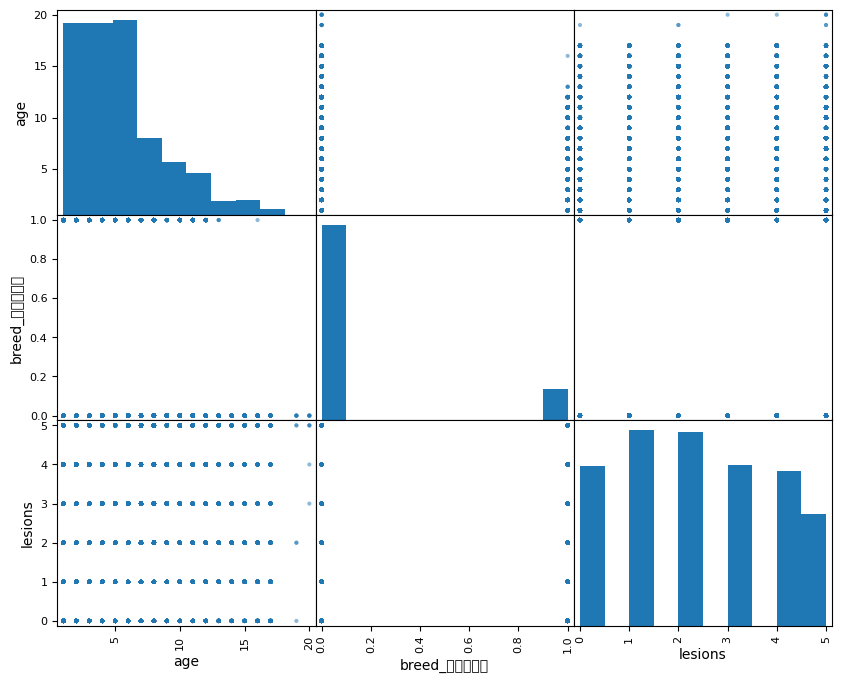

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드
data = pd.read_csv(csv_file_path, encoding='utf-8')
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 불필요한 특징 제거
data.drop(columns=['Raw data ID', 'polygon_location'], inplace=True)

# breed, region, gender를 더미 변수로 변환
data = pd.get_dummies(data, columns=['breed', 'region', 'gender'])

# 특징들 간의 상관관계를 시각화하기 위한 예시: age, breed_포메라니안, lesions
selected_features = ['age', 'breed_포메라니안', 'lesions']
pd.plotting.scatter_matrix(data[selected_features], figsize=(10, 8))
plt.show()

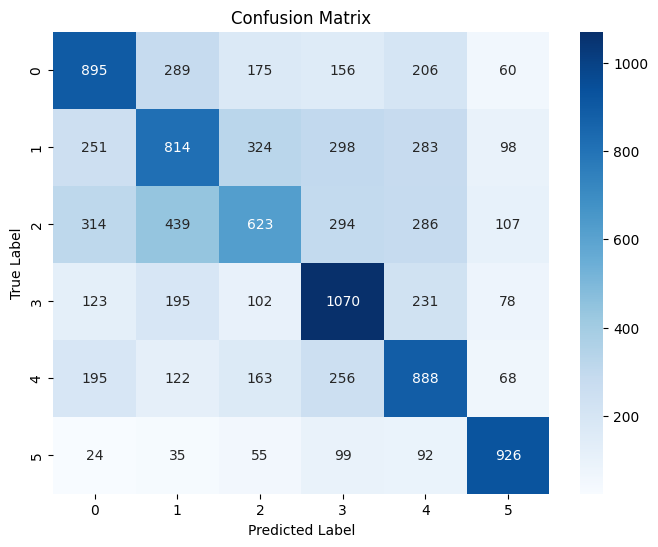

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import xgboost as xgb

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드
data = pd.read_csv(csv_file_path, encoding='utf-8')
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 불필요한 특징 제거
data.drop(columns=['Raw data ID', 'polygon_location'], inplace=True)

# breed, region, gender를 더미 변수로 변환
data = pd.get_dummies(data, columns=['breed', 'region', 'gender'])

# 변환된 특징들과 연속적인 숫자인 'age' 합치기
X = pd.concat([data['age'], pd.DataFrame(data.drop(columns=['lesions', 'age']), columns=data.drop(columns=['lesions', 'age']).columns)], axis=1)

# 타겟 값 설정
y = data['lesions']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 결과
y_pred = model.predict(X_test)

# Confusion matrix 계산
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

C:\Users\oceanlightai\anaconda3\envs\gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\oceanlightai\anaconda3\envs\gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47700 (\N{HANGUL SYLLABLE ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\oceanlightai\anaconda3\envs\gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\oceanlightai\anaconda3\envs\gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\oceanlightai\anaconda3\envs\gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from curren

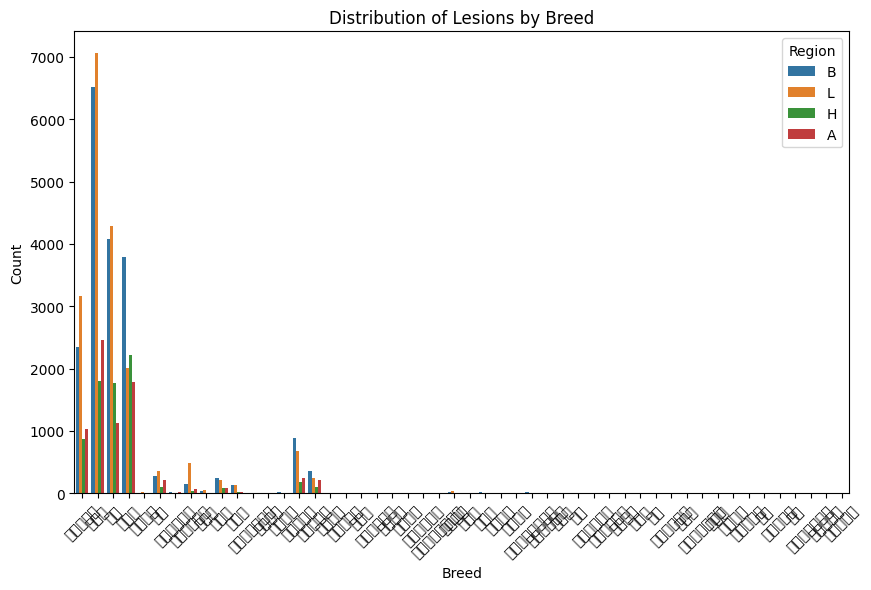

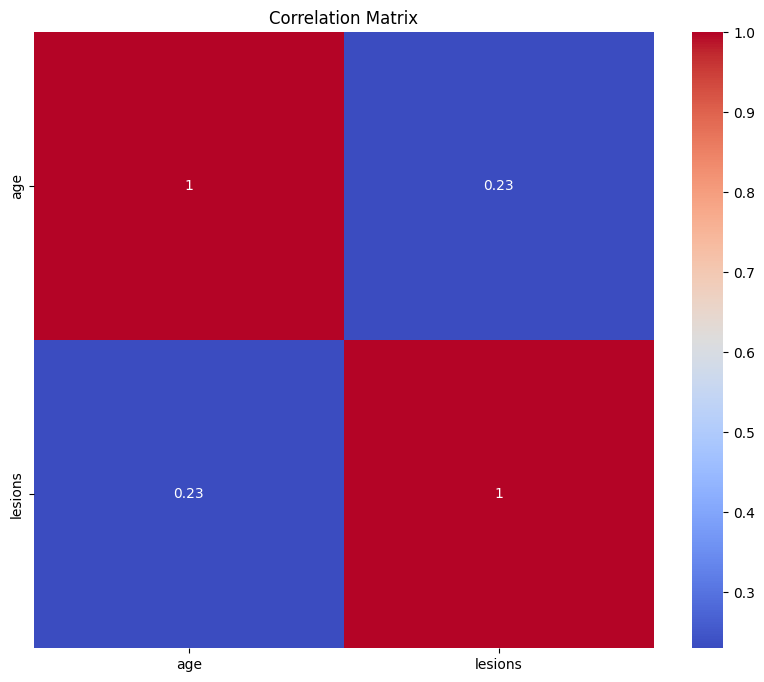

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드
data = pd.read_csv(csv_file_path, encoding='utf-8')
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 종 별 질병 부위의 분포를 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='breed', hue='region', data=data)
plt.title('Distribution of Lesions by Breed')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

# 종 별 질병 부위와 질병 레이블 간의 상관관계 분석
correlation_matrix = data.drop(columns=['Raw data ID', 'polygon_location']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

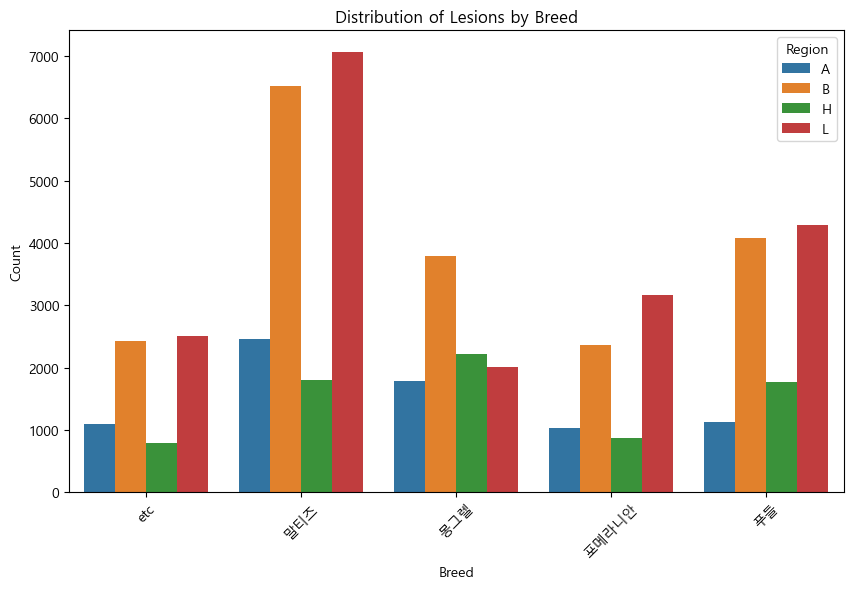

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트 설정 (한글 폰트 지정)
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드 (encoding='utf-8' 설정 추가)
data = pd.read_csv(csv_file_path, encoding='utf-8')
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 종 별 질병 부위의 빈도를 계산
lesions_count = data.groupby(['breed', 'region'])['lesions'].count().reset_index()

# 빈도가 500 이하인 종들을 "etc"로 변경하고 합계를 계산
lesions_sum = lesions_count.groupby('breed')['lesions'].sum().reset_index()
etc_breeds = lesions_sum[lesions_sum['lesions'] <= 2000]['breed'].tolist()
lesions_count.loc[lesions_count['breed'].isin(etc_breeds), 'breed'] = 'etc'
lesions_count = lesions_count.groupby(['breed', 'region'])['lesions'].sum().reset_index()

# 종 별 질병 부위의 분포를 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='breed', y='lesions', hue='region', data=lesions_count)
plt.title('Distribution of Lesions by Breed')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

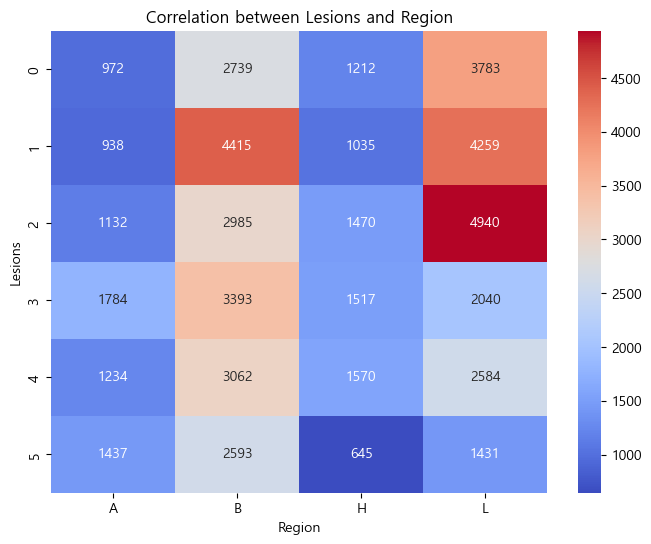

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트 설정 (한글 폰트 지정 - Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드 (encoding='utf-8' 설정 추가)
data = pd.read_csv(csv_file_path, encoding='utf-8')
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 질병과 부위 간의 교차표 생성
cross_tab = pd.crosstab(data['lesions'], data['region'])

# 상관관계 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt="d")
plt.title('Correlation between Lesions and Region')
plt.xlabel('Region')
plt.ylabel('Lesions')
plt.show()

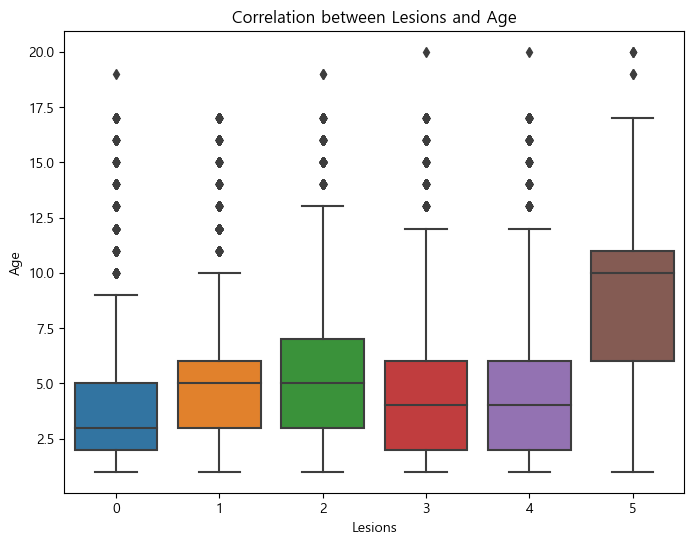

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트 설정 (한글 폰트 지정 - Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드 (encoding='utf-8' 설정 추가)
data = pd.read_csv(csv_file_path, encoding='utf-8')
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 상관관계 상자그림 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x='lesions', y='age', data=data)
plt.title('Correlation between Lesions and Age')
plt.xlabel('Lesions')
plt.ylabel('Age')
plt.show()

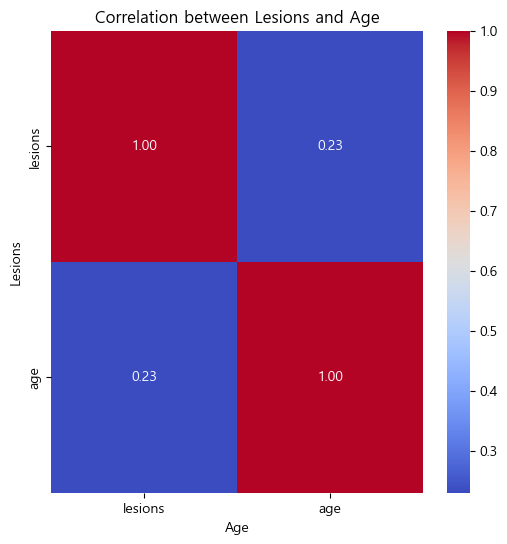

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트 설정 (한글 폰트 지정 - Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드 (encoding='utf-8' 설정 추가)
data = pd.read_csv(csv_file_path, encoding='utf-8')
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 질병과 나이 간의 상관계수 계산
correlation_matrix = data[['lesions', 'age']].corr()

# 상관계수 히트맵 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Lesions and Age')
plt.xlabel('Age')
plt.ylabel('Lesions')
plt.show()


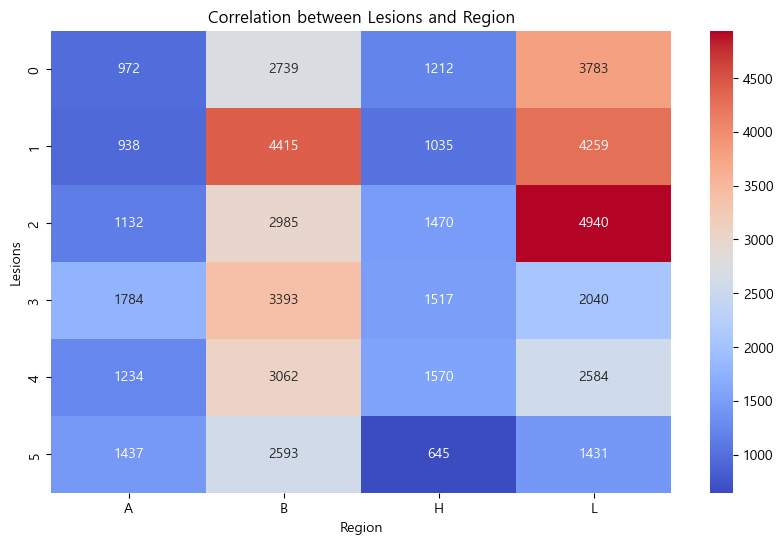

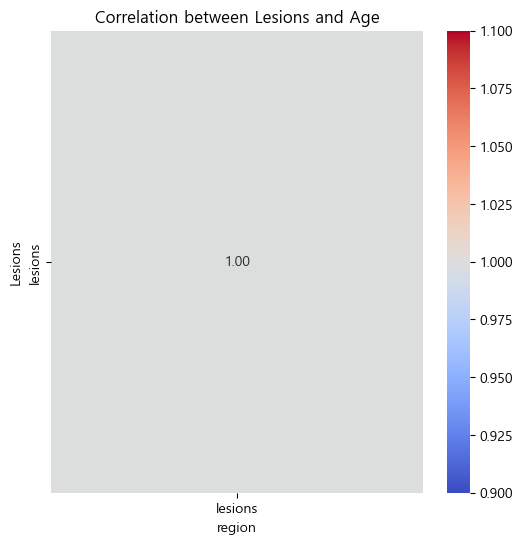

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트 설정 (한글 폰트 지정 - Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드 (encoding='utf-8' 설정 추가)
data = pd.read_csv(csv_file_path, encoding='utf-8')
# 'lesions' 컬럼의 값을 올바른 값으로 수정 (A, H, L, B -> A1, A2, A3, A4, A5, A6)
data['lesions'] = data['lesions'].replace({'A': 'A1', 'H': 'A2', 'L': 'A3', 'B': 'A4'})
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 질병과 부위 간의 교차표 생성
cross_tab = pd.crosstab(data['lesions'], data['region'])
correlation_matrix = data[['lesions', 'region']].corr()
# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt="d")
plt.title('Correlation between Lesions and Region')
plt.xlabel('Region')
plt.ylabel('Lesions')
plt.show()


# 상관계수 히트맵 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Lesions and Age')
plt.xlabel('region')
plt.ylabel('Lesions')
plt.show()


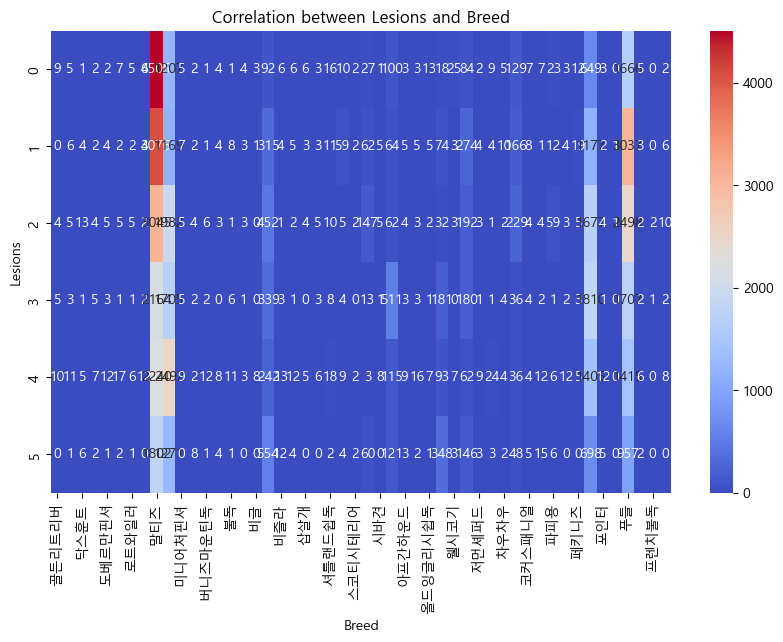

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트 설정 (한글 폰트 지정 - Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드 (encoding='utf-8' 설정 추가)
data = pd.read_csv(csv_file_path, encoding='utf-8')
# 'lesions' 컬럼의 값을 올바른 값으로 수정 (A, H, L, B -> A1, A2, A3, A4, A5, A6)
data['lesions'] = data['lesions'].replace({'A': 'A1', 'H': 'A2', 'L': 'A3', 'B': 'A4'})
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 질병과 종 간의 교차표 생성
cross_tab = pd.crosstab(data['lesions'], data['breed'])

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt="d")
plt.title('Correlation between Lesions and Breed')
plt.xlabel('Breed')
plt.ylabel('Lesions')
plt.show()

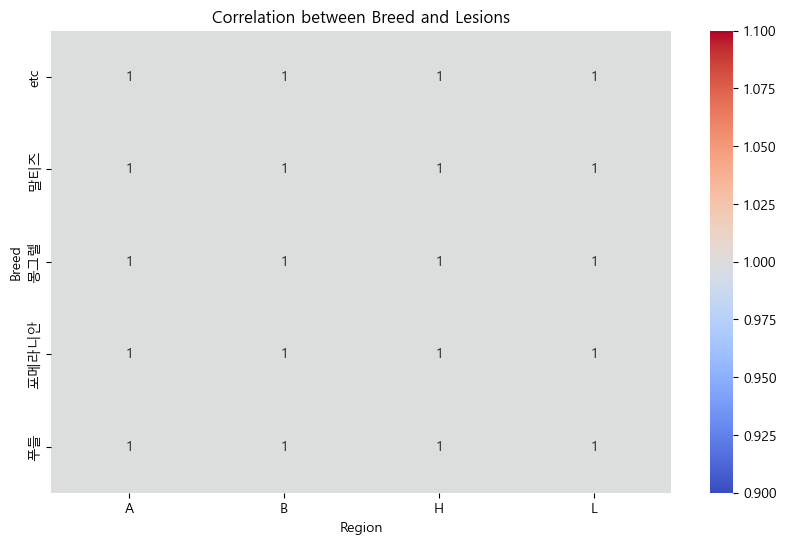

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트 설정 (한글 폰트 지정)
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드 (encoding='utf-8' 설정 추가)
data = pd.read_csv(csv_file_path, encoding='utf-8')
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 종 별 질병 부위의 빈도를 계산
lesions_count = data.groupby(['breed', 'region'])['lesions'].count().reset_index()

# 빈도가 500 이하인 종들을 "etc"로 변경하고 합계를 계산
lesions_sum = lesions_count.groupby('breed')['lesions'].sum().reset_index()
etc_breeds = lesions_sum[lesions_sum['lesions'] <= 2000]['breed'].tolist()
lesions_count.loc[lesions_count['breed'].isin(etc_breeds), 'breed'] = 'etc'
lesions_count = lesions_count.groupby(['breed', 'region'])['lesions'].sum().reset_index()

# 견종과 질병간의 교차표 생성
cross_tab = pd.crosstab(lesions_count['breed'], lesions_count['region'])

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt="d")
plt.title('Correlation between Breed and Lesions')
plt.xlabel('Region')
plt.ylabel('Breed')
plt.show()

Accuracy: 0.4724

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.51      0.49      1781
           1       0.42      0.39      0.40      2068
           2       0.44      0.26      0.33      2063
           3       0.48      0.57      0.52      1799
           4       0.41      0.55      0.47      1692
           5       0.72      0.66      0.69      1231

    accuracy                           0.47     10634
   macro avg       0.49      0.49      0.48     10634
weighted avg       0.47      0.47      0.47     10634



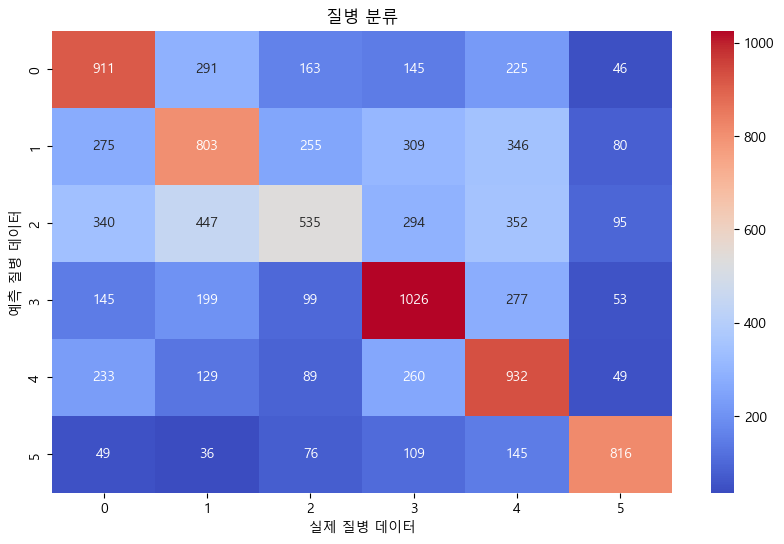

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드 (encoding='utf-8' 설정 추가)
data = pd.read_csv(csv_file_path, encoding='utf-8')
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 특징과 타겟 값 분리
X = data[['breed', 'region', 'age']]
y = data['lesions']

# 범주형 특징들을 원-핫 인코딩으로 변환
X_encoded = pd.get_dummies(X, columns=['breed', 'region'])

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Decision Tree 모델 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = model.predict(X_test)

# 분류 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt="d")
plt.title('질병 분류')
plt.xlabel('실제 질병 데이터')
plt.ylabel('예측 질병 데이터')
plt.show()

Accuracy: 0.4713

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.50      0.48      1781
           1       0.42      0.40      0.41      2068
           2       0.43      0.27      0.33      2063
           3       0.46      0.60      0.52      1799
           4       0.42      0.49      0.45      1692
           5       0.72      0.67      0.69      1231

    accuracy                           0.47     10634
   macro avg       0.49      0.49      0.48     10634
weighted avg       0.47      0.47      0.47     10634



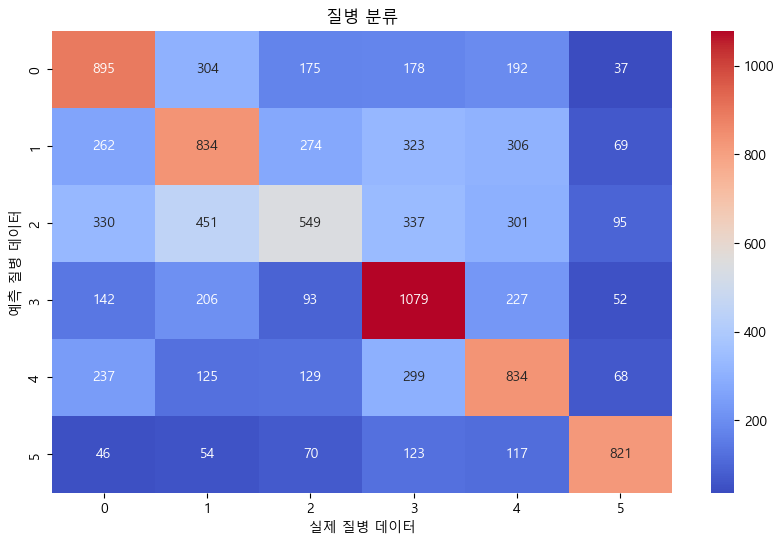

In [59]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트 설정 (한글 폰트 지정)
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드 (encoding='utf-8' 설정 추가)
data = pd.read_csv(csv_file_path, encoding='utf-8')
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 특징과 타겟 값 분리
X = data[['breed', 'region', 'age']]
y = data['lesions']

# 범주형 특징들을 원-핫 인코딩으로 변환
X_encoded = pd.get_dummies(X, columns=['breed', 'region'])

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = model.predict(X_test)

# 분류 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt="d")
plt.title('질병 분류')
plt.xlabel('실제 질병 데이터')
plt.ylabel('예측 질병 데이터')
plt.show()

Accuracy: 0.4735

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.50      0.49      1781
           1       0.42      0.39      0.41      2068
           2       0.44      0.26      0.33      2063
           3       0.48      0.57      0.52      1799
           4       0.41      0.55      0.47      1692
           5       0.72      0.66      0.69      1231

    accuracy                           0.47     10634
   macro avg       0.49      0.49      0.48     10634
weighted avg       0.48      0.47      0.47     10634



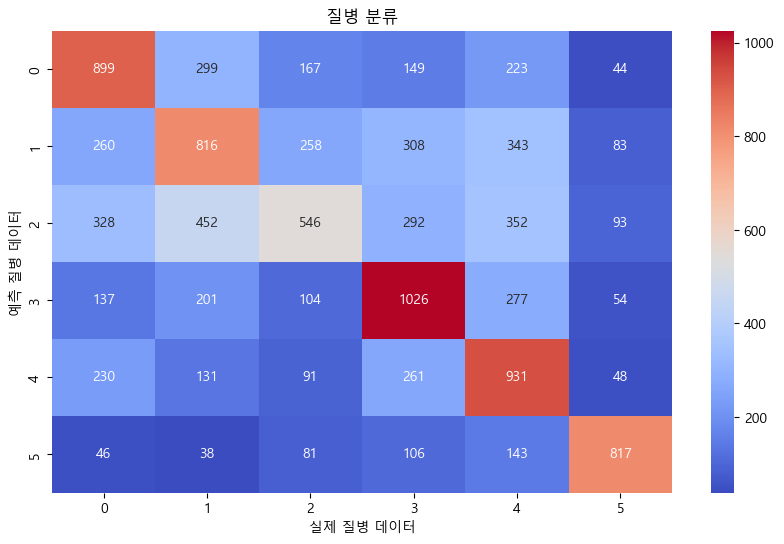

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트 설정 (한글 폰트 지정)
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 경로 설정
csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'
label_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}

# CSV 파일에서 데이터 로드 (encoding='utf-8' 설정 추가)
data = pd.read_csv(csv_file_path, encoding='utf-8')
# 'lesions' 컬럼의 값을 올바른 값으로 수정 (A, H, L, B -> A1, A2, A3, A4, A5, A6)
# train_df와 test_df에 클래스 레이블을 숫자로 변환하여 추가
data['lesions'] = data['lesions'].map(label_mapping)

# 특징과 타겟 값 분리
X = data[['breed', 'region', 'age']]
y = data['lesions']

# 범주형 특징들을 원-핫 인코딩으로 변환
X_encoded = pd.get_dummies(X, columns=['breed', 'region'])

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Random Forest 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = model.predict(X_test)

# 분류 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt="d")
plt.title('질병 분류')
plt.xlabel('실제 질병 데이터')
plt.ylabel('예측 질병 데이터')
plt.show()

In [41]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split

csv_file_path = 'C:/Users/oceanlightai/Desktop/datasets/pet_skin/train/train_skin.csv'

df = pd.read_csv(csv_file_path, encoding='utf-8')

selected_columns = ['breed', 'age', 'gender', 'region', 'lesions']
df_selected = df[selected_columns]

# 'lesions' 열의 문자열 데이터를 숫자로 변환
lesion_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5}
df_selected['lesions'] = df_selected['lesions'].map(lesion_mapping)

target_column = 'lesions'
y_label = df_selected[target_column]
X_features = df_selected.drop(target_column, axis=1)

# 데이터프레임을 범주형으로 변환
for column in X_features.columns:
    X_features[column] = pd.Categorical(X_features[column])

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=42)

# xgboost의 DMatrix로 데이터를 변환
dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(data=X_test, label=y_test, enable_categorical=True)

params = {
    "max_depth": 20, 
    "eta": 0.5, 
    "objective": "multi:softmax",  # 다중 분류를 위해 "multi:softmax" 사용
    "num_class": 6,     
    "eval_metric": "mlogloss"     # "mlogloss"는 다중 분류의 로그 손실 함수
}

num_rounds = 400

wlist = [(dtrain, "train"), (dtest, "eval")]

# 모델 학습
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[0]	train-mlogloss:1.46758	eval-mlogloss:1.48879
[1]	train-mlogloss:1.34859	eval-mlogloss:1.38227
[2]	train-mlogloss:1.28396	eval-mlogloss:1.32692


C:\Users\oceanlightai\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


[3]	train-mlogloss:1.24556	eval-mlogloss:1.29588
[4]	train-mlogloss:1.22121	eval-mlogloss:1.27789
[5]	train-mlogloss:1.20497	eval-mlogloss:1.26711
[6]	train-mlogloss:1.19401	eval-mlogloss:1.26054
[7]	train-mlogloss:1.18602	eval-mlogloss:1.25636
[8]	train-mlogloss:1.18014	eval-mlogloss:1.25369
[9]	train-mlogloss:1.17585	eval-mlogloss:1.25204
[10]	train-mlogloss:1.17267	eval-mlogloss:1.25126
[11]	train-mlogloss:1.17019	eval-mlogloss:1.25105
[12]	train-mlogloss:1.16803	eval-mlogloss:1.25089
[13]	train-mlogloss:1.16641	eval-mlogloss:1.25095
[14]	train-mlogloss:1.16511	eval-mlogloss:1.25149
[15]	train-mlogloss:1.16408	eval-mlogloss:1.25204
[16]	train-mlogloss:1.16318	eval-mlogloss:1.25248
[17]	train-mlogloss:1.16241	eval-mlogloss:1.25277
[18]	train-mlogloss:1.16175	eval-mlogloss:1.25316
[19]	train-mlogloss:1.16123	eval-mlogloss:1.25361
[20]	train-mlogloss:1.16076	eval-mlogloss:1.25426
[21]	train-mlogloss:1.16035	eval-mlogloss:1.25469
[22]	train-mlogloss:1.16000	eval-mlogloss:1.25498
[23]	tr

[166]	train-mlogloss:1.15325	eval-mlogloss:1.27682
[167]	train-mlogloss:1.15324	eval-mlogloss:1.27686
[168]	train-mlogloss:1.15323	eval-mlogloss:1.27693
[169]	train-mlogloss:1.15323	eval-mlogloss:1.27701
[170]	train-mlogloss:1.15322	eval-mlogloss:1.27709
[171]	train-mlogloss:1.15321	eval-mlogloss:1.27717
[172]	train-mlogloss:1.15320	eval-mlogloss:1.27723
[173]	train-mlogloss:1.15319	eval-mlogloss:1.27731
[174]	train-mlogloss:1.15319	eval-mlogloss:1.27742
[175]	train-mlogloss:1.15318	eval-mlogloss:1.27752
[176]	train-mlogloss:1.15317	eval-mlogloss:1.27756
[177]	train-mlogloss:1.15316	eval-mlogloss:1.27768
[178]	train-mlogloss:1.15316	eval-mlogloss:1.27775
[179]	train-mlogloss:1.15315	eval-mlogloss:1.27783
[180]	train-mlogloss:1.15314	eval-mlogloss:1.27789
[181]	train-mlogloss:1.15313	eval-mlogloss:1.27797
[182]	train-mlogloss:1.15313	eval-mlogloss:1.27803
[183]	train-mlogloss:1.15312	eval-mlogloss:1.27812
[184]	train-mlogloss:1.15311	eval-mlogloss:1.27819
[185]	train-mlogloss:1.15310	ev

[327]	train-mlogloss:1.15250	eval-mlogloss:1.28622
[328]	train-mlogloss:1.15250	eval-mlogloss:1.28627
[329]	train-mlogloss:1.15249	eval-mlogloss:1.28633
[330]	train-mlogloss:1.15249	eval-mlogloss:1.28639
[331]	train-mlogloss:1.15249	eval-mlogloss:1.28643
[332]	train-mlogloss:1.15249	eval-mlogloss:1.28647
[333]	train-mlogloss:1.15248	eval-mlogloss:1.28653
[334]	train-mlogloss:1.15248	eval-mlogloss:1.28655
[335]	train-mlogloss:1.15248	eval-mlogloss:1.28659
[336]	train-mlogloss:1.15248	eval-mlogloss:1.28662
[337]	train-mlogloss:1.15247	eval-mlogloss:1.28667
[338]	train-mlogloss:1.15247	eval-mlogloss:1.28672
[339]	train-mlogloss:1.15247	eval-mlogloss:1.28675
[340]	train-mlogloss:1.15247	eval-mlogloss:1.28679
[341]	train-mlogloss:1.15247	eval-mlogloss:1.28682
[342]	train-mlogloss:1.15246	eval-mlogloss:1.28688
[343]	train-mlogloss:1.15246	eval-mlogloss:1.28692
[344]	train-mlogloss:1.15246	eval-mlogloss:1.28695
[345]	train-mlogloss:1.15246	eval-mlogloss:1.28700
[346]	train-mlogloss:1.15245	ev

Accuracy: 0.4972
Precision: 0.4936
Recall: 0.4972
F1 Score: 0.4916


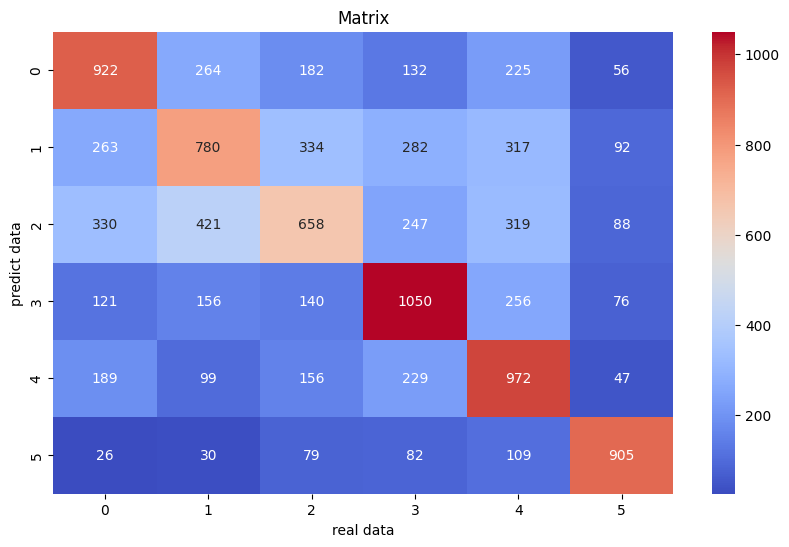

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Get the predicted probabilities for all classes (output shape: (num_data_points, num_classes))
pred_probs = xgb_model.predict(dtest, output_margin=True, iteration_range=(0, num_rounds))

# Convert the predicted probabilities to class labels (output shape: (num_data_points,))
preds = np.argmax(pred_probs, axis=1)

# Compute the evaluation metrics
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average='weighted')
recall = recall_score(y_test, preds, average='weighted')
f1 = f1_score(y_test, preds, average='weighted')
conf_matrix = confusion_matrix(y_test, preds)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, cmap='coolwarm', fmt="d")
plt.title("Matrix")
plt.xlabel('real data')
plt.ylabel('predict data')
plt.show()